In [1]:
#Description: Create and plot multiple technical indicators

In [2]:
#Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
#Store the data
df = pd.read_csv('DOGEUSDT-1h-2024-04.csv')
df['time'] = pd.to_datetime(df['open_time'], unit = 'ms')
#Set the time as the index
df = df.set_index(pd.DatetimeIndex(df['time'].values))
#Show the data
df

,open_time,open,high,low,close,volume,close_time,quote_volume,count,taker_buy_volume,taker_buy_quote_volume,ignore,time
2024-04-01 00:00:00,1711929600000,0.22023,0.22032,0.21649,0.21880,416220470,1711933199999,9.088220e+07,171274,207148752,4.523404e+07,0,2024-04-01 00:00:00
2024-04-01 01:00:00,1711933200000,0.21881,0.21935,0.21555,0.21719,333844067,1711936799999,7.247288e+07,129561,162236878,3.522140e+07,0,2024-04-01 01:00:00
2024-04-01 02:00:00,1711936800000,0.21719,0.21752,0.21519,0.21689,210475257,1711940399999,4.555317e+07,86823,96207699,2.082889e+07,0,2024-04-01 02:00:00
2024-04-01 03:00:00,1711940400000,0.21688,0.21750,0.21450,0.21613,211311271,1711943999999,4.558222e+07,79197,100596979,2.170698e+07,0,2024-04-01 03:00:00
2024-04-01 04:00:00,1711944000000,0.21614,0.21698,0.21459,0.21551,210677265,1711947599999,4.546244e+07,80124,105479540,2.276857e+07,0,2024-04-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-30 19:00:00,1714503600000,0.13204,0.13278,0.12901,0.13076,574610913,1714507199999,7.509665e+07,129965,268323190,3.509110e+07,0,2024-04-30 19:00:00
2024-04-30 20:00:00,1714507200000,0.13075,0.13318,0.13073,0.13209,384350242,1714510799999,5.083246e+07,89314,195915343,2.590991e+07,0,2024-04-30 20:00:00
2024-04-30 21:00:00,1714510800000,0.13209,0.13274,0.13181,0.13223,127836344,1714514399999,1.690519e+07,35434,60985647,8.064758e+06,0,2024-04-30 21:00:00
2024-04-30 22:00:00,1714514400000,0.13223,0.13448,0.13213,0.13324,235269312,1714517999999,3.136847e+07,62022,113562813,1.514359e+07,0,2024-04-30 22:00:00


In [4]:
#Create functions to calculate the SMA & EMA
#Create the Simple Moving Average (SMA)
def SMA(data, period, column='close'):
    return data[column].rolling(window=period).mean()

#Create the Exponential or Smoothed Moving Average (EMA)
def EMA(data, period=20, column='close'):
    return data[column].ewm(span=period, adjust = False).mean()

In [5]:
def MACD(data, period_long=26, period_short=12, period_signal=9, column='close'):
    # Calculate the Short Term Exponential Moving Average
    ShortEMA = EMA(data, period_short, column=column)
    # Calculate the Long Term Exponential Moving Average
    LongEMA = EMA(data, period_long, column=column)
    # Calculate the Moving Average Convergence/Divergence (MACD)
    data['MACD'] = ShortEMA - LongEMA
    # Calculate the signal line
    data['Signal_Line'] = EMA(data, period_signal, column='MACD')
    # Calculate the histogram
    data['Histogram'] = data['MACD'] - data['Signal_Line']

    return data


In [6]:
#Create a function to compute the Relative Strength Index (RSI)
def RSI(data, period = 14, column='close'):
    delta = data[column].diff(1)
    delta = delta[1:]
    up = delta.copy()
    down = delta.copy()
    up[up < 0] = 0
    down[down >0 ] = 0
    data['up'] = up
    data['down'] = down
    AVG_Gain = SMA(data, period, column = 'up')
    AVG_Loss = abs(SMA(data, period, column = 'down'))
    RS = AVG_Gain / AVG_Loss
    RSI = 100.0 - (100.0/(1.0 + RS))

    data['RSI'] = RSI
    
    return data

In [7]:
#Create/add to the data set
MACD(df)
RSI(df)
df['SMA20'] = SMA(df, 20)
df['SMA200'] = SMA(df, 200)
df['EMA'] = EMA(df)

In [8]:
#Show the data
df

,open_time,open,high,low,close,volume,close_time,quote_volume,count,taker_buy_volume,...,time,MACD,Signal_Line,Histogram,up,down,RSI,SMA20,SMA200,EMA
2024-04-01 00:00:00,1711929600000,0.22023,0.22032,0.21649,0.21880,416220470,1711933199999,9.088220e+07,171274,207148752,...,2024-04-01 00:00:00,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.218800
2024-04-01 01:00:00,1711933200000,0.21881,0.21935,0.21555,0.21719,333844067,1711936799999,7.247288e+07,129561,162236878,...,2024-04-01 01:00:00,-0.000128,-0.000026,-0.000103,0.00000,-0.00161,NaN,NaN,NaN,0.218647
2024-04-01 02:00:00,1711936800000,0.21719,0.21752,0.21519,0.21689,210475257,1711940399999,4.555317e+07,86823,96207699,...,2024-04-01 02:00:00,-0.000252,-0.000071,-0.000181,0.00000,-0.00030,NaN,NaN,NaN,0.218479
2024-04-01 03:00:00,1711940400000,0.21688,0.21750,0.21450,0.21613,211311271,1711943999999,4.558222e+07,79197,100596979,...,2024-04-01 03:00:00,-0.000406,-0.000138,-0.000268,0.00000,-0.00076,NaN,NaN,NaN,0.218256
2024-04-01 04:00:00,1711944000000,0.21614,0.21698,0.21459,0.21551,210677265,1711947599999,4.546244e+07,80124,105479540,...,2024-04-01 04:00:00,-0.000571,-0.000225,-0.000347,0.00000,-0.00062,NaN,NaN,NaN,0.217994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-30 19:00:00,1714503600000,0.13204,0.13278,0.12901,0.13076,574610913,1714507199999,7.509665e+07,129965,268323190,...,2024-04-30 19:00:00,-0.002965,-0.002347,-0.000617,0.00000,-0.00129,13.090677,0.138107,0.150198,0.136657
2024-04-30 20:00:00,1714507200000,0.13075,0.13318,0.13073,0.13209,384350242,1714510799999,5.083246e+07,89314,195915343,...,2024-04-30 20:00:00,-0.002958,-0.002469,-0.000488,0.00133,0.00000,17.012195,0.137433,0.150057,0.136222
2024-04-30 21:00:00,1714510800000,0.13209,0.13274,0.13181,0.13223,127836344,1714514399999,1.690519e+07,35434,60985647,...,2024-04-30 21:00:00,-0.002908,-0.002557,-0.000351,0.00014,0.00000,18.758003,0.136908,0.149917,0.135842
2024-04-30 22:00:00,1714514400000,0.13223,0.13448,0.13213,0.13324,235269312,1714517999999,3.136847e+07,62022,113562813,...,2024-04-30 22:00:00,-0.002755,-0.002597,-0.000158,0.00101,0.00000,29.961977,0.136385,0.149787,0.135594


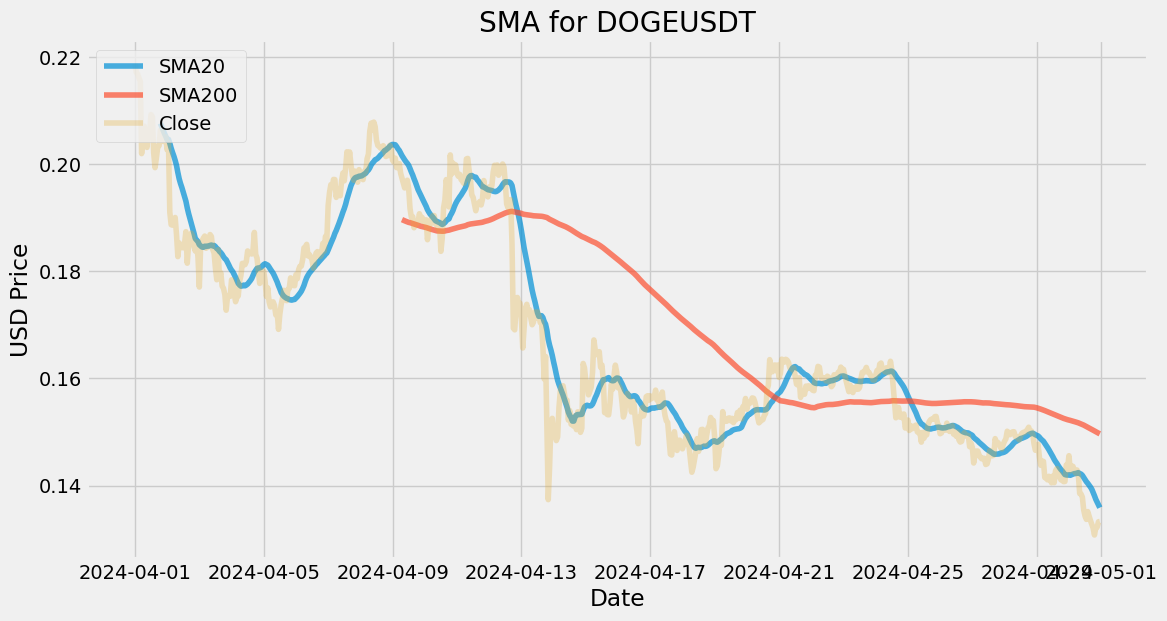

In [9]:
#Plot the chart of SMA Indicator
plt.figure(figsize=(12.2, 6.4))
plt.plot(df.index, df['SMA20'], label='SMA20', alpha=0.7)
plt.plot(df.index, df['SMA200'], label='SMA200', alpha=0.7)
plt.plot(df.index, df['close'], label='Close', alpha=0.3)  # Adjust alpha for transparency

plt.title('SMA for DOGEUSDT')
plt.ylabel('USD Price')
plt.xlabel('Date')
plt.legend(loc='upper left')
plt.show()

In [10]:
#A Moving Average is a simple technical indicator that calculates the close price of an asset over particular period of time.
#In our case 20 and 200 period MAs calculates the average close price of the last 20 and 200 candles.
#A MA helps us reduce the market noise, and point a clear picture of the market trend
#Different MAs are used for different trends.
#200 MA can be used to identify the long-term trend of the market
#20 MA can be used to determine the short-term trend of the market
#20/50/100/200 are the most popular ones

#A MA is used to identify the trend and simplify the price action

#Identify the trend. Its primary function so it helps us identify the trend of the price
#Price vs MA. The location of the price compared to the MA can help us determine the trend of the markets.
#If the price is currently above the moving average and has consistently stayed above it then the price is considered to be in an uptrend
#As a logical trader I want to trade in the direction of the trend
#Therefore I should be looking for buying opportunities in this scenario
#On the other hand if price is below MA and stayed below for some time then the price can be considered to be in a downtrend
#We should look for selling opportunities in this case
#If price switches above and below the MA its best to stay away and wait for a clear trend to develop

#Using two MAs will help to avoid bad trades.
#For example consider a period from 2024-04-21 to 2024-04-25.
#When we zoom into this section of the chart we see that the price was moving around the 20 MA for an extended period of time.
#Therefore it means that the price is in a short-term sideways trend.
#But at the same time the price stayed above the 200 MA.
#This means that the price is in a long term uptrend.
#So we have a sideways trend with a long-term downward bias.
#In such a case either we avoid trading because of the sideways movement.
#Or we can place buy trades around the lower end of the range.
#But we can not enter sell trades at the upper end of the range because that would go against the long-term trend

#MA Slope. It gives a hint about the strength of the trend.
#In an uptrend the MA is sloped upwards. In a strong uotrend the slope of the MA will be steep and close to a 45 degrees
#In a weak uptrend we see a gentle upward slope.
#The same applies to downtrends.
#Strong Trend = Aggressive Entries. Weak Trend = Careful Trades

#Large VS Small MA. For example 20 MA is a smaller MA and 200 MA is a larger MA.
#When a smaller MA is above the larger MA the price is considered to be in an uptrend.
#In an uptrend we look for buying opportunities.
#When a smaller MA is below the larger MA the price is considered to be in an downtrend.
#In a downtrend we look for selling opportunities.

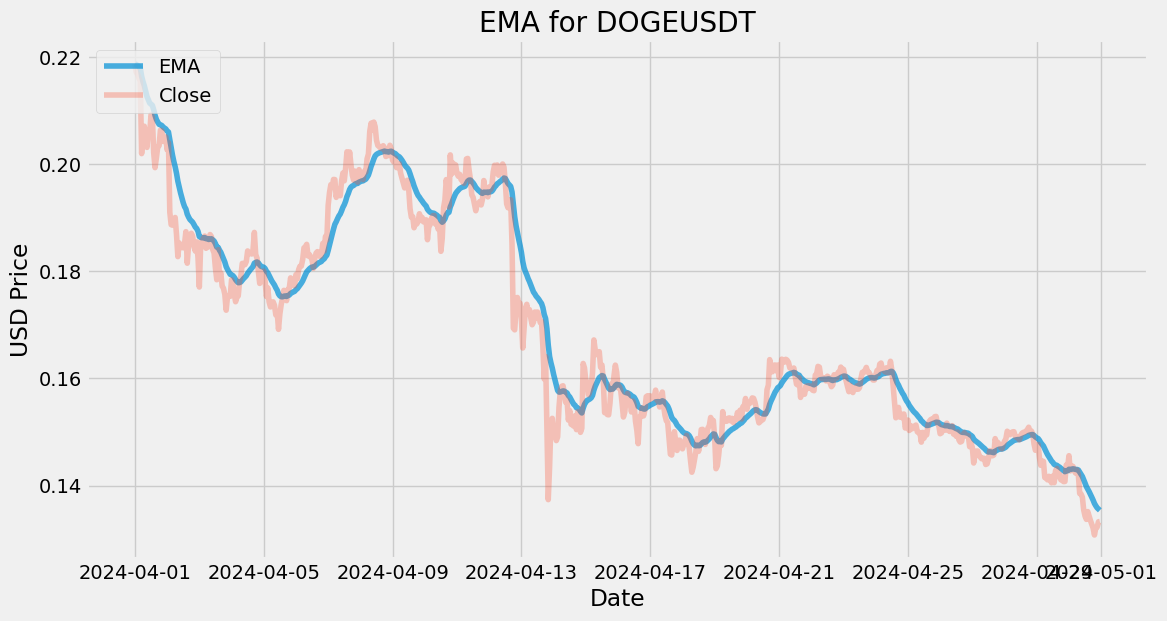

In [11]:
#Plot the chart of EMA Indicator
plt.figure(figsize=(12.2, 6.4))
plt.plot(df.index, df['EMA'], label='EMA', alpha=0.7)
plt.plot(df.index, df['close'], label='Close', alpha=0.3)  # Adjust alpha for transparency

plt.title('EMA for DOGEUSDT')
plt.ylabel('USD Price')
plt.xlabel('Date')
plt.legend(loc='upper left')
plt.show()

In [12]:
#EMA is more sensitive to the front-end prices in its average
#With the 20 EMA the more recent prices are going to have a havier weight to the calculation than the earlier prices
#Whereas with the SMA every price for the past 20 days is treated equally

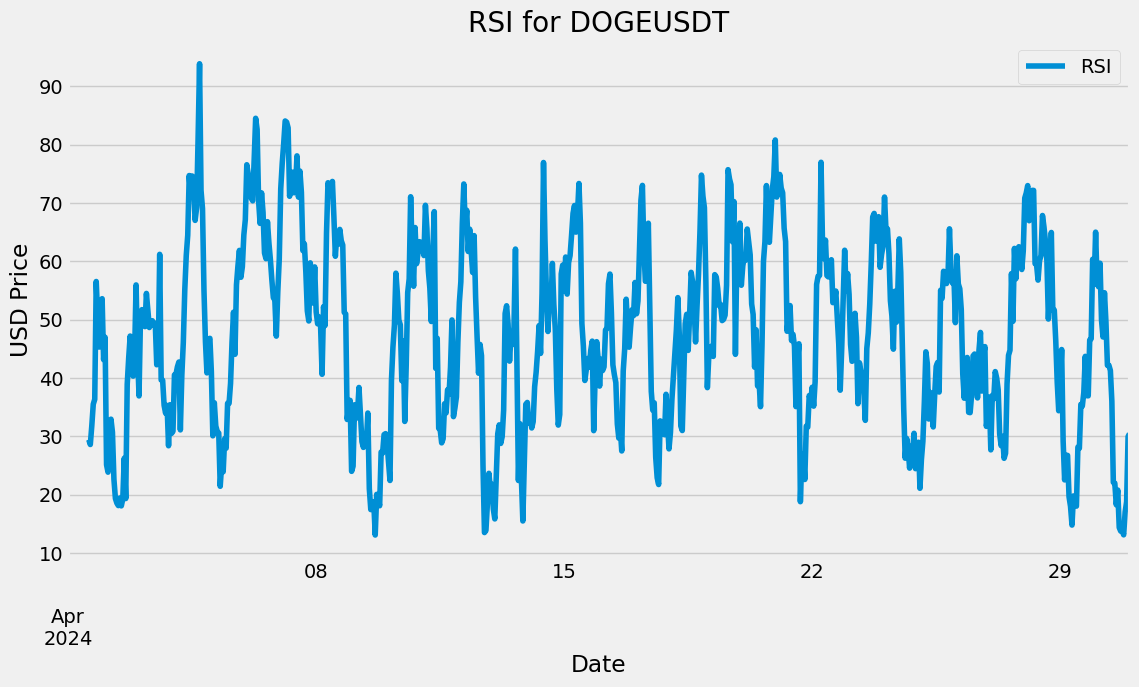

In [13]:
#Plot the chart
#Create a list of columns to keep
column_list = ['RSI']
df[column_list].plot(figsize=(12.2, 6.4))
plt.title('RSI for DOGEUSDT')
plt.ylabel('USD Price')
plt.xlabel('Date')
plt.show()

In [14]:
#There are different strategies where the buy and sell signals are at 30 and 70.
#If the RSI level for the chart is above 70 thats an indication to sell the stock.
#If it is below 30 that would be an indication to buy the stock.

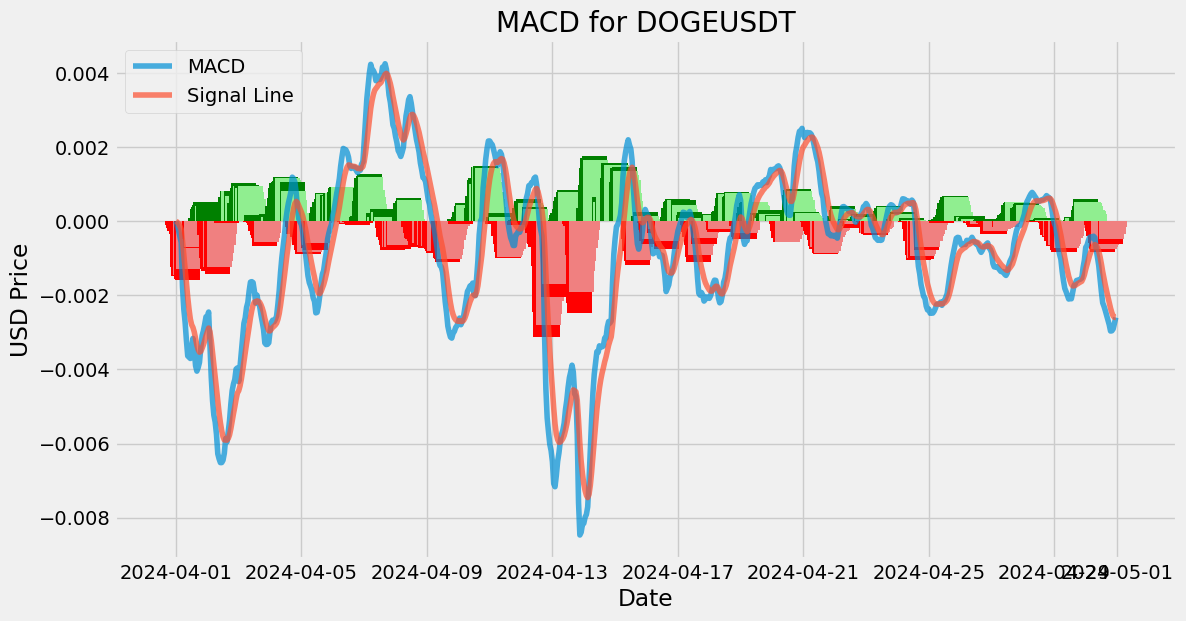

In [15]:
#Plot the chart of MACD Indicator
#Determine the color for each histogram bar
colors = []
for i in range(1, len(df)):
    if df['Histogram'].iloc[i] > 0:
        if df['Histogram'].iloc[i] > df['Histogram'].iloc[i - 1]:
            colors.append('green')  # Expanding upward
        else:
            colors.append('lightgreen')  # Contracting upward
    else:
        if df['Histogram'].iloc[i] < df['Histogram'].iloc[i - 1]:
            colors.append('red')  # Expanding downward
        else:
            colors.append('lightcoral')  # Contracting downward

# Prepend a color for the first bar (neutral color as there's no previous bar to compare)
colors.insert(0, 'grey')

# Plot MACD, Signal Line, and Histogram
plt.figure(figsize=(12.2, 6.4))
plt.plot(df.index, df['MACD'], label='MACD', alpha=0.7)
plt.plot(df.index, df['Signal_Line'], label='Signal Line', alpha=0.7)
plt.bar(df.index, df['Histogram'], color=colors)  # Use colors based on condition

plt.title('MACD for DOGEUSDT')
plt.ylabel('USD Price')
plt.xlabel('Date')
plt.legend(loc='upper left')
plt.show()

In [16]:
#When the MACD line is above the signal line the histogram will show green bars above the zero line.
#This shows that the price is in an uptrend.
#When the MACD is below the signal line the histogram will show red bars below the zero line.
#This shows that the price is in downtrend.

#Histogram Slope. The Slope or Shape of the histogram gives us a deeper understanding of the trend.
#When the price is in a strong trend the distance between the MACD line and the signal line increases.
#As a result the histogram expands.
#An expanding histogram is a sign of growing momentum.
#Therefore if the histogram is expanding we should look for entries in the direction of the trend.
#As the trend gets weak the histogram starts to shrink.
#This is a sign that the momentum of the move is lost and the price might reverse or stay sideways.
#During such times it is better to exit our trades and wait for the price to generate momentum again.
#We see dark colors when the histogram is expanding and light colors when histogram is shrinking.
#At the beginning of an up move when we see two or more dark green bars with an expanding histogram it is a sign that the upwards momentum is solid and growing.
#Therefore it is an excellent opportunity to look for buying entries.
#Then when histogram starts to fall its a time to get out of the trade.
#This indicates that the momentum has decreased.
#At the beginning of downmove we see dark red bars with an expanding histogram.
#This is the last chance to exit your previous buy positions.
#These dark red bars sign that new sellers have entered the markets and they are moving the markets with heavy momentum.
#Its time to enter new sell trades.
#Once the price moves a certain distance the histogram starts to shrink as we see light red bars.
#Its an early indication that the downmove is losing momentum and a reversal or sideways range may establish itself.

#Crossovers. The MACD crossover can give you an early sign of a reversal.
#It can also provide you with better entries and smaller stop loses.
#But they generate far more false signals. So we cant use them in isolation.

#Zero Line Crossovers. 

#Zero Line Pullbacks.The MACD line will often pullback to the zero line and the price will bounce back.
#So in an uptrend if the MACD line pulls back to the zero line it is a good place to make buy trades. 
#But we must wait for the macd line to cross above the signal line to make a buy trade.
#Similarly in a downtrend if the macd line pulls back to the zero line it is a good place to make sell entries.

#Divergence. Is when the price and the macd five different outputs. There are bullish and bearish divergence.
#A bullish one occurs when the price makes a lower low but macd makes a higher low.
#This shows that the momentum on the last down move was lesser than the prior down move.
#That means that the sellers are tired and price likely will stall or reverse.
#A bearish one occurs when the price makes a higher high but macd makes a lower high.
#This shows that the momentum on the last up move was lesser than the prior up move.
#We only look at clear divergence! That can be noticed with naked eye.